In [52]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.integrate import quad
from scipy.special import erfinv
from scipy.stats import skew, kurtosis


In [26]:
m0 = 1.66e-27
K_40_mass = 40*m0 #kg
kb = 1.3806e-23 #J/K
T = 30 #K

beta = 1/(kb*T)

A = np.sqrt(beta/math.pi)




0.0

# Task 1: Basic Statistical Properties

### a)


A function is considered a probability densiy function if it satisfies these two condition: 

- Non-negativity, meaning f(Ew) >= 0 for all Ew >=0
- Normalization, where the integral of the PDF over its domain must be equal to 1

np.float64(0.0)

/var/folders/0y/496_zl5905jfg059dd524bvm0000gn/T/ipykernel_87384/1990732419.py:10: RuntimeWarning: divide by zero encountered in divide
  return A * np.exp(-beta * eps) / np.sqrt(eps)


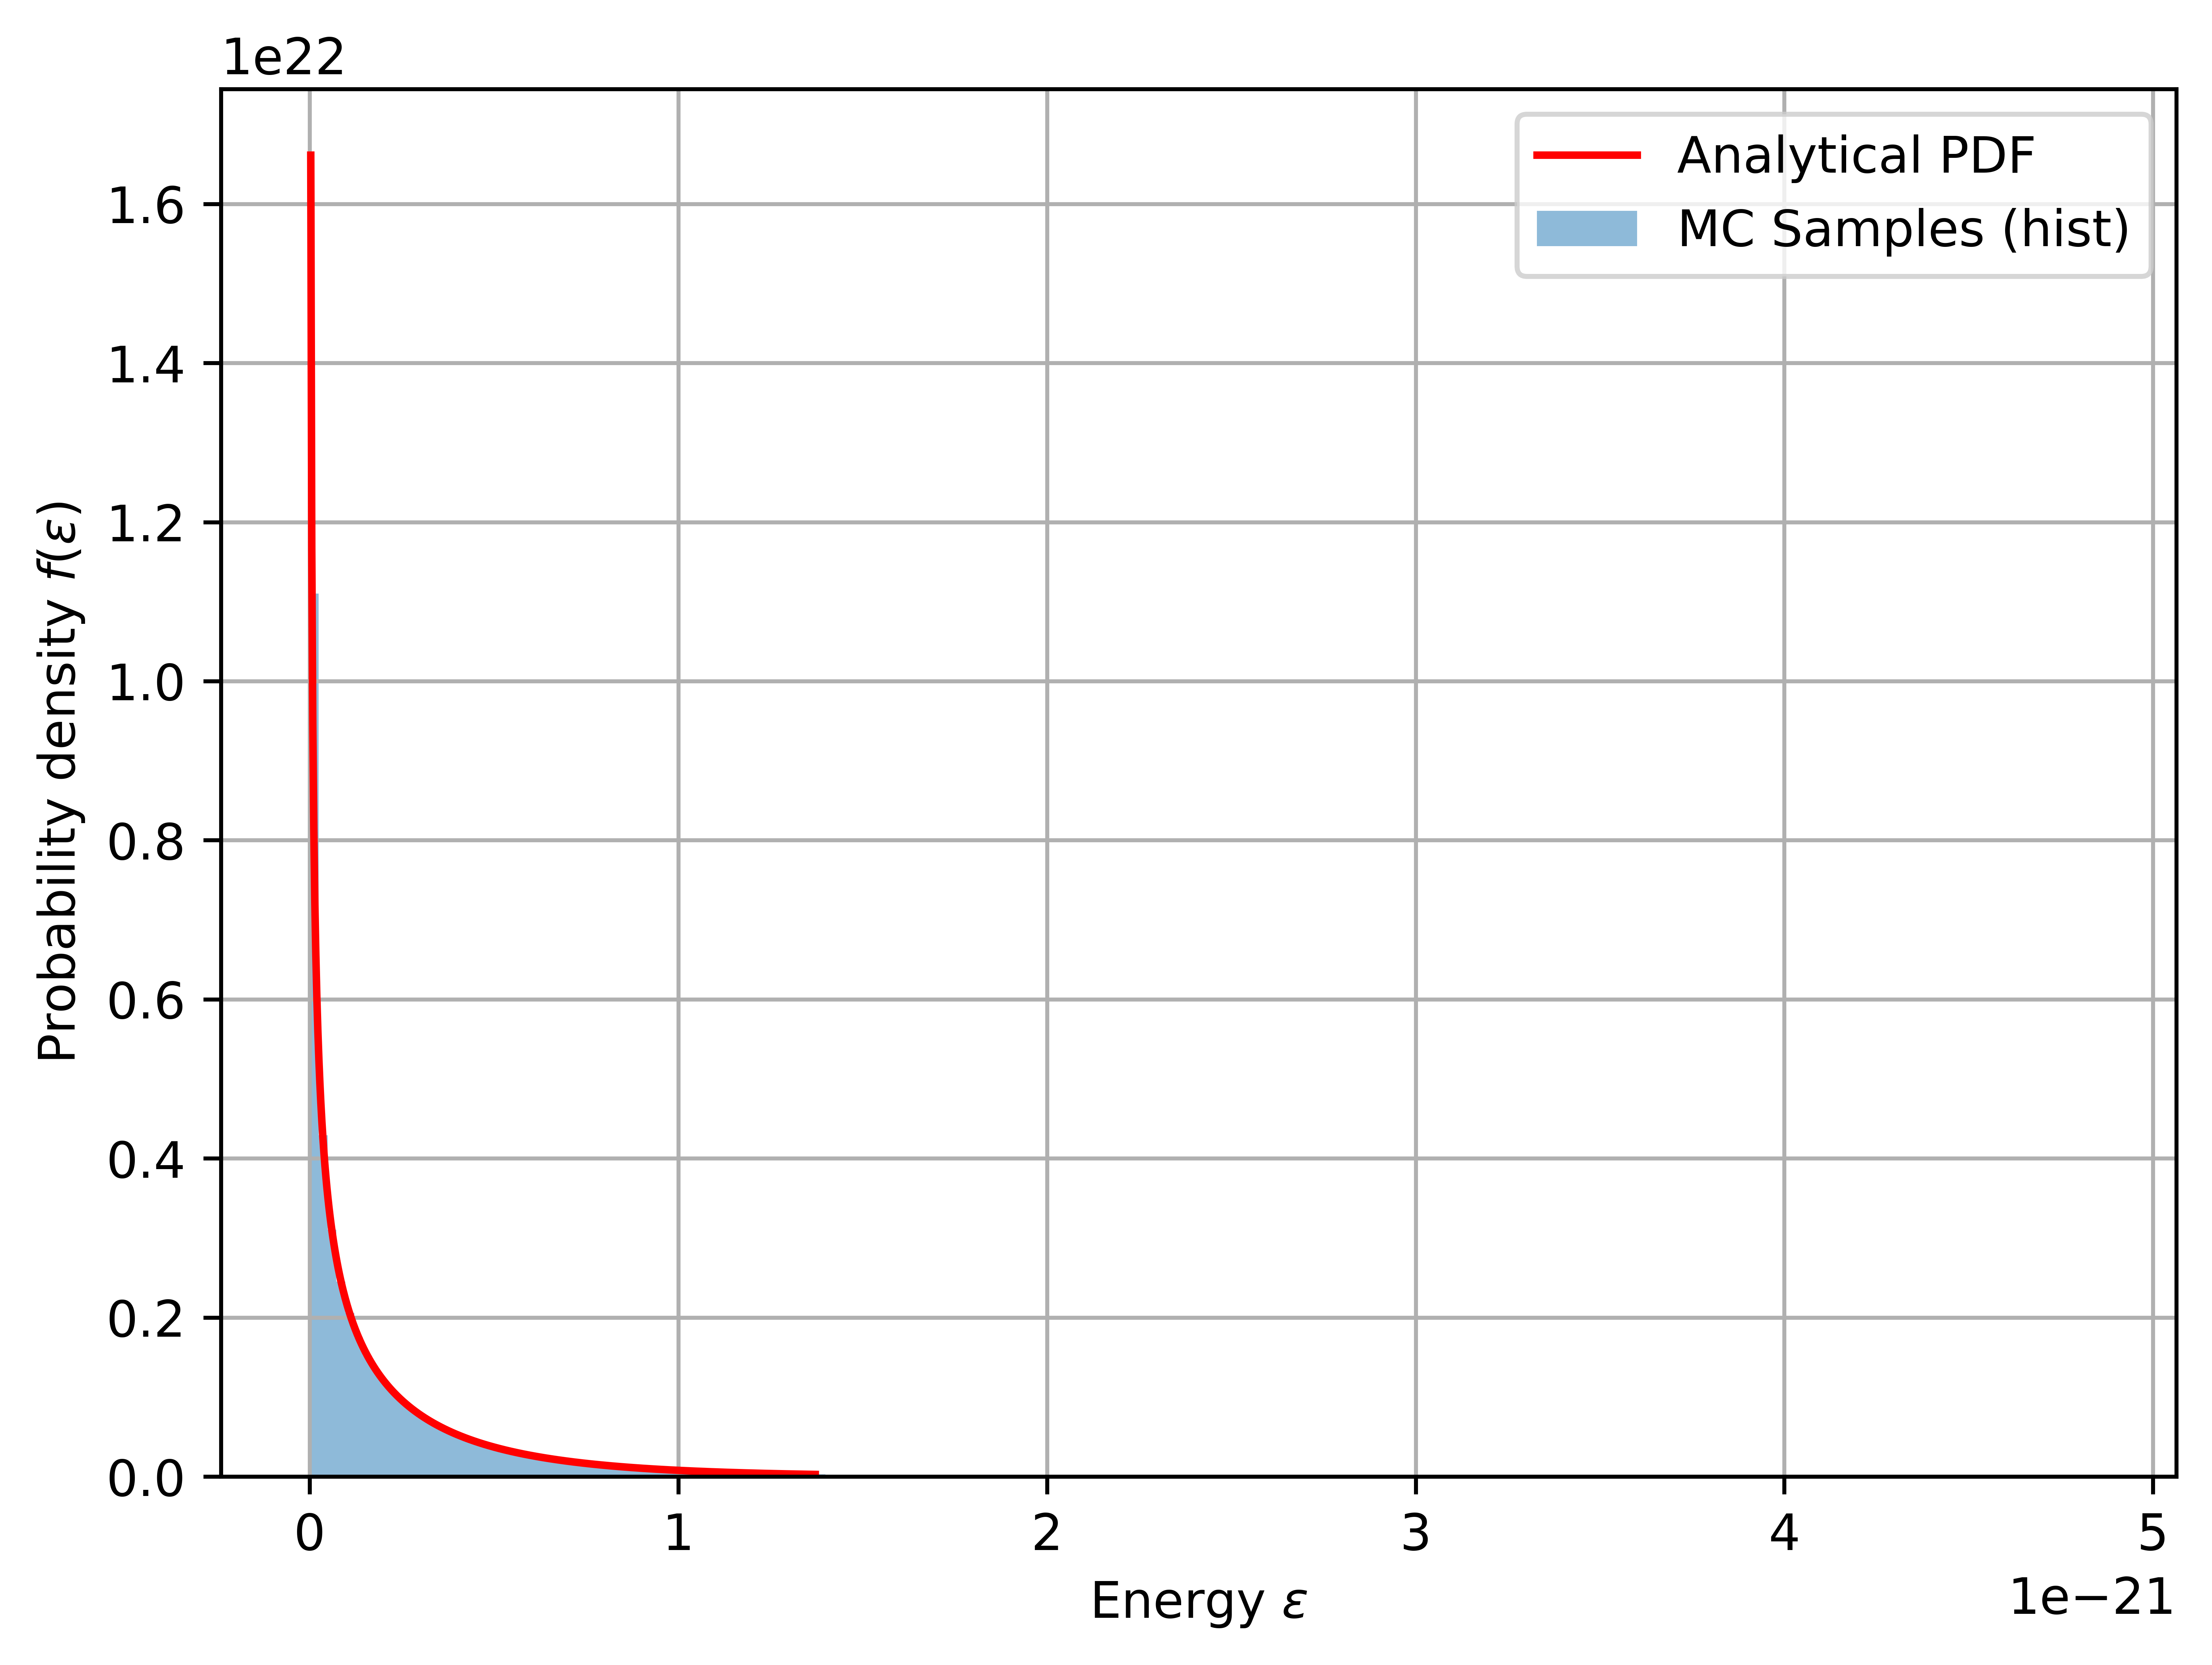

In [ ]:


def sample_energy_inverse_transform(N, beta):
    """Generate N samples using the inverse transform method."""
    U = np.random.rand(N)
    return (erfinv(U)**2) / beta

def pdf(eps, beta):
    """Analytical PDF for f(ε) = sqrt(beta/pi) * exp(-beta ε) / sqrt(ε)."""
    import math
    A = np.sqrt(beta / math.pi)
    return A * np.exp(-beta * eps) / np.sqrt(eps)

# --- Main script ---
N = 1000000  # e.g. 1e5 samples

# 1) Generate samples
energy_samples = sample_energy_inverse_transform(N, beta)

# 2) Make a histogram of the samples
bins = 200
hist, bin_edges = np.histogram(energy_samples, bins=bins, density=True)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

# 3) Plot the histogram versus the analytical PDF
plt.figure(figsize=(7,5), dpi=1000)
plt.bar(bin_centers, hist, width=(bin_edges[1]-bin_edges[0]),
        alpha=0.5, label='MC Samples (hist)')

# Evaluate the PDF on a smooth grid
eps_grid = np.linspace(0, np.percentile(energy_samples, 99.0), 500)
pdf_values = pdf(eps_grid, beta)
plt.plot(eps_grid, pdf_values, 'r-', label='Analytical PDF')

plt.xlabel(r'Energy $\varepsilon$')
plt.ylabel(r'Probability density $f(\varepsilon)$')

plt.legend()
plt.grid(True)
plt.show()

In [50]:
mean_values = np.mean(sample_energy_inverse_transform(N, beta))

analytical_expectation_value = 0.5 * kb * T


print(f"Sample Mean <Ew>: {mean_values:.5e} J")
print(f"Analytical Expectation Value: {analytical_expectation_value:.5e} J")


print(f"Relative Error: {abs(mean_values - analytical_expectation_value) / analytical_expectation_value:.5e}")

Sample Mean <Ew>: 2.06707e-22 J
Analytical Expectation Value: 2.07090e-22 J
Relative Error: 1.84805e-03


/var/folders/0y/496_zl5905jfg059dd524bvm0000gn/T/ipykernel_87384/3585492362.py:5: RuntimeWarning: divide by zero encountered in divide
  return A * np.exp(-beta * eps) / np.sqrt(eps)


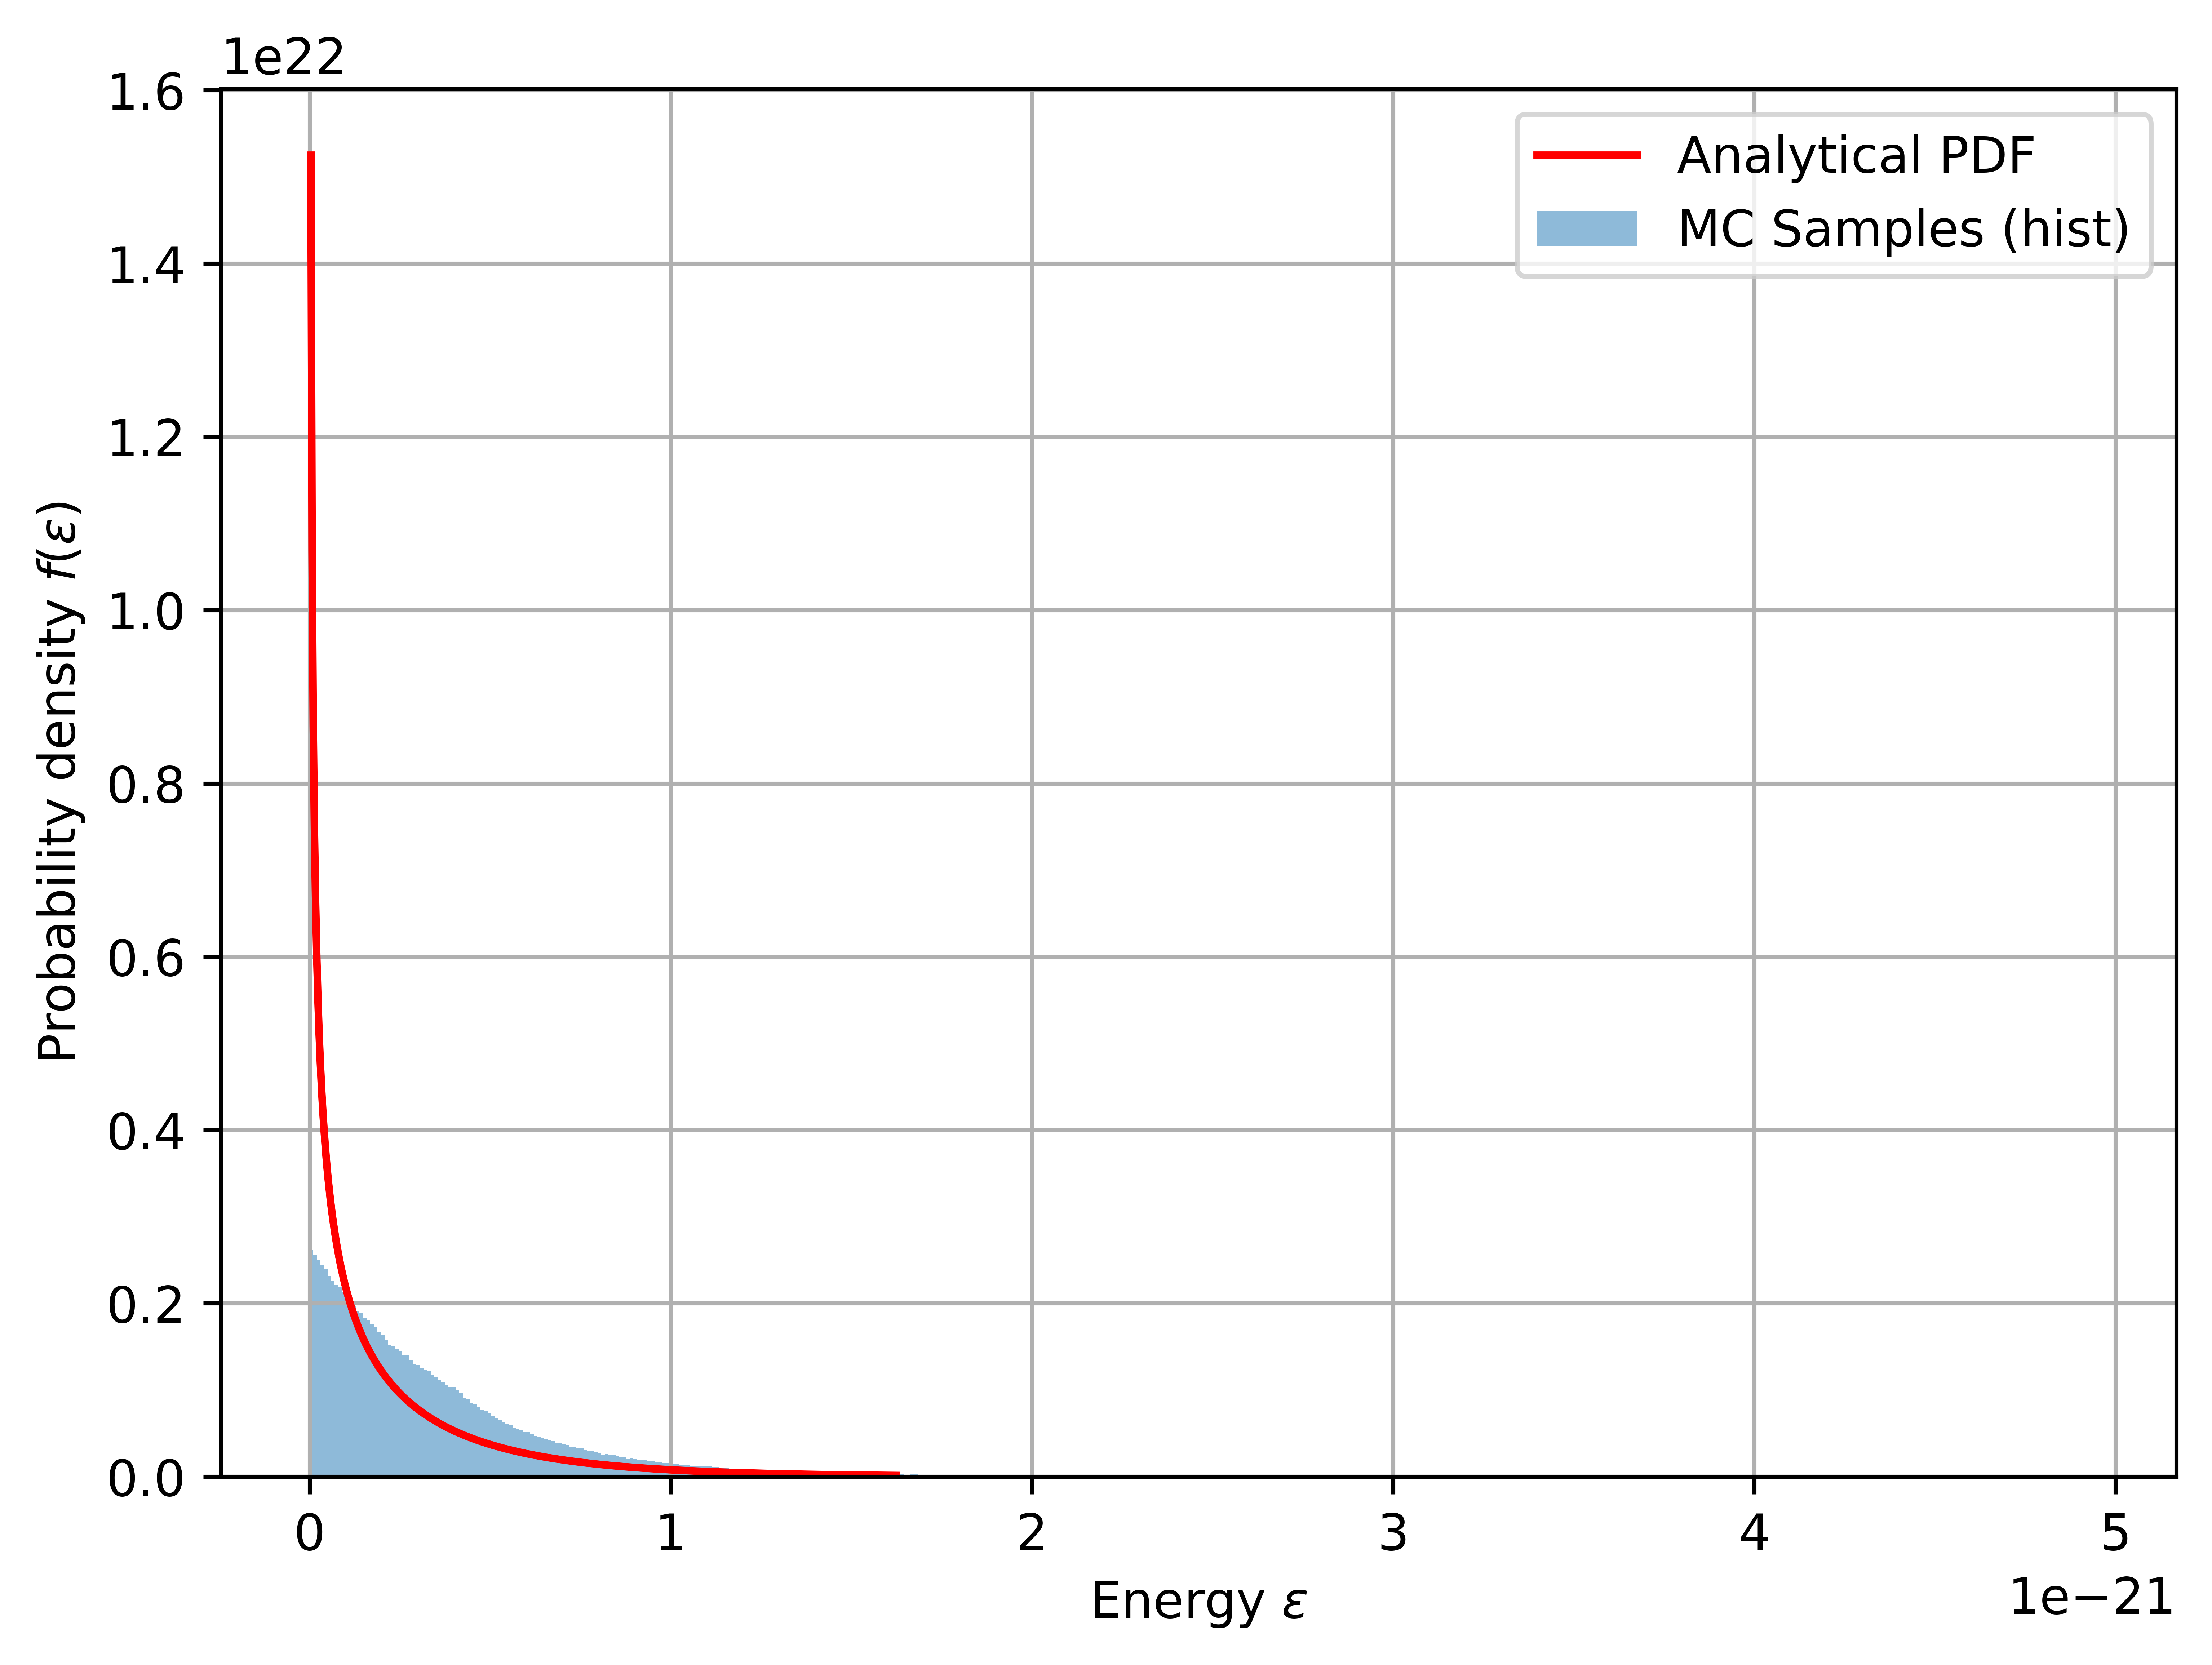

In [45]:
def target_pdf(eps, beta):
    """Target PDF: f(ε) = sqrt(beta/pi) * exp(-beta ε) / sqrt(ε)."""
    
    A = np.sqrt(beta / math.pi)
    return A * np.exp(-beta * eps) / np.sqrt(eps)


def proposal_pdf(eps, lam):
    """Proposal PDF: g(ε) = λ exp(-λ ε)."""
    return lam * np.exp(-lam * eps)

def sample_from_proposal(lam, size):
    """Generate samples from exponential distribution g(ε)."""
    return np.random.exponential(1 / lam, size)

def rejection_sampling(N, beta, lam):
    """Rejection sampling using target f(ε) and proposal g(ε)."""
    M = np.sqrt(beta / (lam * np.pi)) 
    samples = []
    
    while len(samples) < N:
       
        eps_proposed = sample_from_proposal(lam, 1)[0]
        
       
        accept_prob = target_pdf(eps_proposed, beta) / (M * proposal_pdf(eps_proposed, lam))
        
        
        if np.random.rand() < accept_prob:
            samples.append(eps_proposed)
    
    return np.array(samples)


N = 1000000
lam = beta  


samples = rejection_sampling(N, beta, lam)


bins = 500
hist, bin_edges = np.histogram(samples, bins=bins, density=True)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

plt.figure(figsize=(7, 5), dpi=1000)


plt.bar(bin_centers, hist, width=(bin_edges[1] - bin_edges[0]), alpha=0.5, label='MC Samples (hist)')


eps_grid = np.linspace(0, np.percentile(samples, 99.0), 500)

pdf_values = target_pdf(eps_grid, beta)

plt.plot(eps_grid, pdf_values, 'r-', label='Analytical PDF')

plt.xlabel(r'Energy $\varepsilon$')
plt.ylabel(r'Probability density $f(\varepsilon)$')

plt.legend()
plt.grid(True)
plt.show()

In [49]:

mean_samples = np.mean(rejection_sampling(N, beta, lam))
analytical_expectation_value = 0.5 * kb * T


print(f"Sample Mean <Ew>: {mean_samples:.5e} J")
print(f"Analytical Expectation Value: {analytical_expectation_value:.5e} J")


print(f"Relative Error: {abs(mean_samples - analytical_expectation_value) / analytical_expectation_value:.5e}")

Sample Mean <Ew>: 3.50766e-22 J
Analytical Expectation Value: 2.07090e-22 J
Relative Error: 6.93787e-01


In [53]:
N = 1000000
beta = 1/(kb*T)
lam = beta

def compute_statistics(samples):
    """Compute mean, variance, skewness, and kurtosis of the energy samples."""
    mean = np.mean(samples)  
    variance = np.var(samples)
    skewness = skew(samples)  
    kurt = kurtosis(samples, fisher=False)  
    
    return mean, variance, skewness, kurt

mean_Inverse, variance_Inverse, skewness_Inverse, kurt_Inverse = compute_statistics(sample_energy_inverse_transform(N, beta))

mean_Neumann, variance_Neumann, skewness_Neumann, kurt_Neumann = compute_statistics(rejection_sampling(N, beta, lam))



print(f"Mean (⟨E⟩): {mean_Inverse:.5e} J")
print(f"Variance: {variance_Inverse:.5e} J^2")
print(f"Skewness: {skewness_Inverse:.5f}")
print(f"Kurtosis: {kurt_Inverse:.5f}\n\n")


print(f"Mean (⟨E⟩): {mean_Neumann:.5e} J")
print(f"Variance: {variance_Neumann:.5e} J^2")
print(f"Skewness: {skewness_Neumann:.5f}")
print(f"Kurtosis: {kurt_Neumann:.5f}")

Mean (⟨E⟩): 2.06977e-22 J
Variance: 8.52831e-44 J^2
Skewness: 2.79736
Kurtosis: 14.59004


Mean (⟨E⟩): 3.50431e-22 J
Variance: 1.19278e-43 J^2
Skewness: 2.14862
Kurtosis: 10.44882
